In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/TopVideoGames1995-2021Metacritic/all_games.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [4]:
df["user_review"] = pd.to_numeric(df["user_review"],errors='coerce')
df['platform'] = df.platform.astype('category')
df['name'] = df.name.astype(str)

In [5]:
df.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [6]:
without_review = df.drop('summary',axis=1)
without_review.head()

,name,platform,release_date,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9


In [7]:
Mean_Platform = without_review.groupby('platform').mean()
Mean_Platform = Mean_Platform.reset_index()

In [8]:
without_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          18800 non-null  object  
 1   platform      18800 non-null  category
 2   release_date  18800 non-null  object  
 3   meta_score    18800 non-null  int64   
 4   user_review   17435 non-null  float64 
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 606.7+ KB


In [9]:
print("\033[1m"+"Top 10 games by metascore across all platform"+"\033[0m")
without_review.sort_values('meta_score',ascending=False)[:10]

Top 10 games by metascore across all platform


,name,platform,release_date,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",98,7.9
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
14,Tony Hawk's Pro Skater 3,PlayStation 2,"October 28, 2001",97,7.5
23,NFL 2K1,Dreamcast,"September 7, 2000",97,6.2
22,The House in Fata Morgana - Dreams of the Reve...,Switch,"April 9, 2021",97,8.2
21,Halo: Combat Evolved,Xbox,"November 14, 2001",97,8.7
20,Super Mario Odyssey,Switch,"October 27, 2017",97,8.9


In [10]:
print("\033[1m"+"Top 10 games by User scores across all platform"+"\033[0m")
without_review.sort_values('user_review',ascending=False)[:10]

Top 10 games by User scores across all platform


,name,platform,release_date,meta_score,user_review
3504,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,PSP,"October 25, 2010",81,9.7
2450,Ghost Trick: Phantom Detective,DS,"January 11, 2011",83,9.7
4953,Rochard,PlayStation 3,"September 27, 2011",79,9.7
14836,Metal Torrent,DS,"May 24, 2010",62,9.7
9550,After Burner Climax,Xbox 360,"April 21, 2010",72,9.7
4844,GrimGrimoire,PlayStation 2,"June 26, 2007",79,9.7
10936,Tengami,Wii U,"November 13, 2014",70,9.7
12434,Crystar,PlayStation 4,"August 27, 2019",67,9.6
4573,Superliminal,Xbox One,"July 7, 2020",80,9.6
7638,Superliminal,Switch,"July 7, 2020",75,9.6


In [11]:
Consoles_PC = [' PC',' PlayStation 4',' Xbox One',]
print("\033[1m" + "The Top Games of PC according to meta score is" + "\033[0m")
without_review[without_review['platform']==' PC'].sort_values(by='meta_score',ascending=False)[:10]

The Top Games of PC according to meta score is


,name,platform,release_date,meta_score,user_review
10,Disco Elysium: The Final Cut,PC,"March 30, 2021",97,8.3
25,Grand Theft Auto V,PC,"April 13, 2015",96,7.8
32,The Orange Box,PC,"October 10, 2007",96,9.3
38,Half-Life,PC,"November 19, 1998",96,9.1
42,BioShock,PC,"August 21, 2007",96,8.6
24,Half-Life 2,PC,"November 16, 2004",96,9.2
45,Baldur's Gate II: Shadows of Amn,PC,"September 24, 2000",95,9.1
62,Portal 2,PC,"April 18, 2011",95,9.1
91,BioShock Infinite,PC,"March 25, 2013",94,8.6
110,Sid Meier's Civilization IV,PC,"October 25, 2005",94,8.2


In [12]:
Consoles_PC = [' PC',' PlayStation 4',' Xbox One',' PlayStation 5',' Xbox Series X']
print("\033[1m" + "The Top Games of PC according to user score is" + "\033[0m")
without_review[without_review['platform']==' PC'].sort_values(by='user_review',ascending=False)[:10]

The Top Games of PC according to user score is


,name,platform,release_date,meta_score,user_review
11304,Diaries of a Spaceport Janitor,PC,"September 16, 2016",69,9.6
114,The Witcher 3: Wild Hunt,PC,"May 18, 2015",93,9.4
267,The Witcher 3: Wild Hunt - Blood and Wine,PC,"May 30, 2016",92,9.3
32,The Orange Box,PC,"October 10, 2007",96,9.3
360,Planescape: Torment,PC,"December 14, 1999",91,9.2
432,Portal,PC,"October 10, 2007",90,9.2
202,Warcraft III: Reign of Chaos,PC,"July 3, 2002",92,9.2
455,Deus Ex,PC,"June 23, 2000",90,9.2
459,Half-Life 2: Episode Two,PC,"October 10, 2007",90,9.2
938,Counter-Strike,PC,"November 8, 2000",88,9.2


In [13]:
current_generation = [' PlayStation 5',' Xbox Series X']
print("\033[1m" + "The Top Games of current generation according to meta score is" + "\033[0m")
without_review[without_review.platform.isin(current_generation)].sort_values(by='meta_score',ascending=False)[:10]

The Top Games of current generation according to meta score is


,name,platform,release_date,meta_score,user_review
120,Hades,Xbox Series X,"August 13, 2021",93,8.5
157,Hades,PlayStation 5,"August 13, 2021",93,8.4
230,Demon's Souls,PlayStation 5,"November 12, 2020",92,8.0
445,Microsoft Flight Simulator,Xbox Series X,"July 27, 2021",90,8.0
516,Tony Hawk's Pro Skater 1 + 2,PlayStation 5,"March 26, 2021",90,7.1
578,It Takes Two,Xbox Series X,"March 26, 2021",89,8.6
635,Final Fantasy VII Remake Intergrade,PlayStation 5,"June 10, 2021",89,8.5
655,Tony Hawk's Pro Skater 1 + 2,Xbox Series X,"March 26, 2021",89,4.9
714,Disco Elysium: The Final Cut,PlayStation 5,"March 30, 2021",89,7.4
722,Devil May Cry 5: Special Edition,PlayStation 5,"November 12, 2020",89,8.2


In [14]:
current_generation = [' PlayStation 5',' Xbox Series X']
print("\033[1m" + "The Top Games of current generation according to meta score is" + "\033[0m")
without_review[without_review.platform.isin(current_generation)].sort_values(by='meta_score',ascending=False)[:10]

The Top Games of current generation according to meta score is


,name,platform,release_date,meta_score,user_review
120,Hades,Xbox Series X,"August 13, 2021",93,8.5
157,Hades,PlayStation 5,"August 13, 2021",93,8.4
230,Demon's Souls,PlayStation 5,"November 12, 2020",92,8.0
445,Microsoft Flight Simulator,Xbox Series X,"July 27, 2021",90,8.0
516,Tony Hawk's Pro Skater 1 + 2,PlayStation 5,"March 26, 2021",90,7.1
578,It Takes Two,Xbox Series X,"March 26, 2021",89,8.6
635,Final Fantasy VII Remake Intergrade,PlayStation 5,"June 10, 2021",89,8.5
655,Tony Hawk's Pro Skater 1 + 2,Xbox Series X,"March 26, 2021",89,4.9
714,Disco Elysium: The Final Cut,PlayStation 5,"March 30, 2021",89,7.4
722,Devil May Cry 5: Special Edition,PlayStation 5,"November 12, 2020",89,8.2


In [15]:
print("\033[1m" + "The Top Games of current generation according to user score is" + "\033[0m")
without_review[without_review.platform.isin(current_generation)].sort_values(by='user_review',ascending=False)[:10]

The Top Games of current generation according to user score is


,name,platform,release_date,meta_score,user_review
2407,Astro's Playroom,PlayStation 5,"November 12, 2020",83,9.3
780,It Takes Two,PlayStation 5,"March 26, 2021",88,9.2
1154,Tales of Arise,PlayStation 5,"September 10, 2021",87,9.1
1174,Tales of Arise,Xbox Series X,"September 10, 2021",87,9.0
2651,Lost Judgment,PlayStation 5,"September 24, 2021",83,8.9
863,Ratchet & Clank: Rift Apart,PlayStation 5,"June 11, 2021",88,8.7
8303,Lost in Random,Xbox Series X,"September 10, 2021",74,8.7
4977,Sackboy: A Big Adventure,PlayStation 5,"November 12, 2020",79,8.7
4112,Kena: Bridge of Spirits,PlayStation 5,"September 21, 2021",80,8.6
578,It Takes Two,Xbox Series X,"March 26, 2021",89,8.6


In [16]:
last_generation = [' PlayStation 4',' Xbox One']
print("\033[1m" + "The Top Games of last generation according to meta score is" + "\033[0m")
without_review[without_review.platform.isin(last_generation)].sort_values(by='meta_score',ascending=False)[:10]

The Top Games of last generation according to meta score is


,name,platform,release_date,meta_score,user_review
7,Red Dead Redemption 2,Xbox One,"October 26, 2018",97,8.0
16,Red Dead Redemption 2,PlayStation 4,"October 26, 2018",97,8.5
17,Grand Theft Auto V,PlayStation 4,"November 18, 2014",97,8.4
8,Grand Theft Auto V,Xbox One,"November 18, 2014",97,7.9
59,Persona 5 Royal,PlayStation 4,"March 31, 2020",95,8.4
60,The Last of Us Remastered,PlayStation 4,"July 29, 2014",95,9.2
65,Metal Gear Solid V: The Phantom Pain,Xbox One,"September 1, 2015",95,7.5
72,God of War,PlayStation 4,"April 20, 2018",94,9.2
81,Celeste,Xbox One,"January 26, 2018",94,7.4
171,Uncharted 4: A Thief's End,PlayStation 4,"May 10, 2016",93,8.8


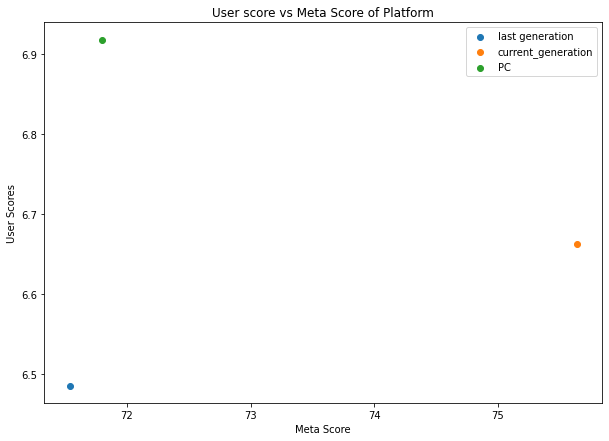

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(without_review[without_review.platform.isin(last_generation)]['meta_score'].mean(),without_review[without_review.platform.isin(last_generation)]['user_review'].mean(),label="last generation")
plt.scatter(without_review[without_review.platform.isin(current_generation)]['meta_score'].mean(),without_review[without_review.platform.isin(current_generation)]['user_review'].mean(),label="current_generation")
plt.scatter(without_review[without_review['platform']==' PC']['meta_score'].mean(),without_review[without_review['platform']==' PC']['user_review'].mean(),label="PC")
plt.legend()

plt.xlabel("Meta Score")
plt.ylabel("User Scores")
T=plt.title("User score vs Meta Score of Platform")

In [18]:
print("\033[1m"+f"Average Meta Score across all platforms {without_review.meta_score.mean()} "+"\033[0m")

Average Meta Score across all platforms 70.6488829787234 


In [19]:
print("\033[1m"+f"Average user score across all platforms {without_review.user_review.mean()} "+"\033[0m")

Average user score across all platforms 6.990845999426491 


In [20]:
data = without_review.meta_score
print("\033[1m"+f"The five number summary min,max,std,mean,median of meta scores across all platform {np.min(data),np.max(data),'{0:.2f}'.format(np.std(data)),'{0:.2f}'.format(np.mean(data)),np.median(data)}"+"\033[0m")

The five number summary min,max,std,mean,median of meta scores across all platform (20, 99, '12.22', '70.65', 72.0)


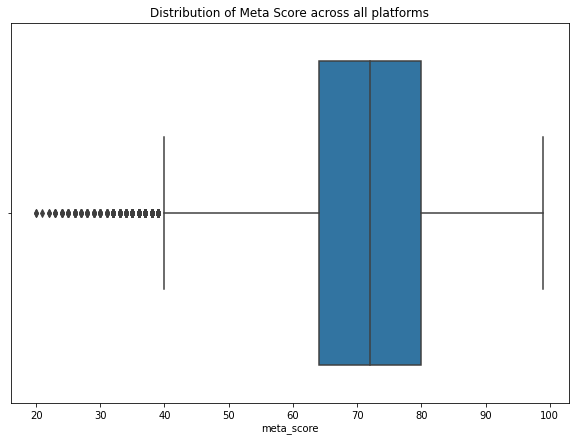

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='meta_score',data=without_review)
T = plt.title("Distribution of Meta Score across all platforms")

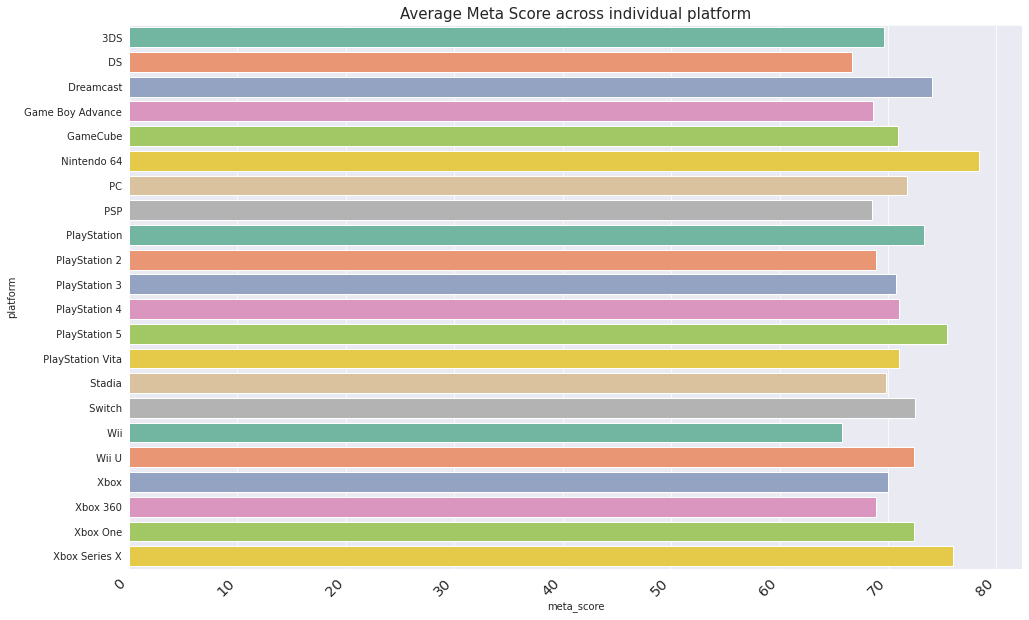

In [22]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y = 'platform',x='meta_score',data=Mean_Platform,palette="Set2")
ax = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
T = plt.title('Average Meta Score across individual platform',size=15)

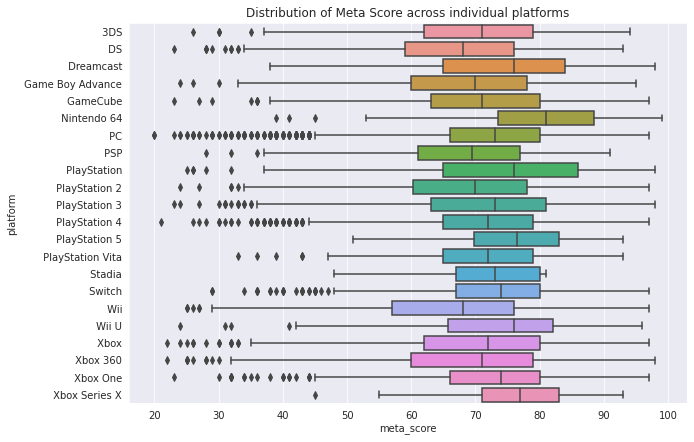

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='meta_score',y='platform',data=without_review)
T = plt.title("Distribution of Meta Score across individual platforms")

In [24]:
data = without_review.user_review
print("\033[1m"+f"The five number summary min,max,std,mean,median of meta scores across all platform {np.min(data),np.max(data),'{0:.2f}'.format(np.std(data)),'{0:.2f}'.format(np.mean(data)),np.nanmedian(data)}"+"\033[0m")

The five number summary min,max,std,mean,median of meta scores across all platform (0.2, 9.7, '1.35', '6.99', 7.3)


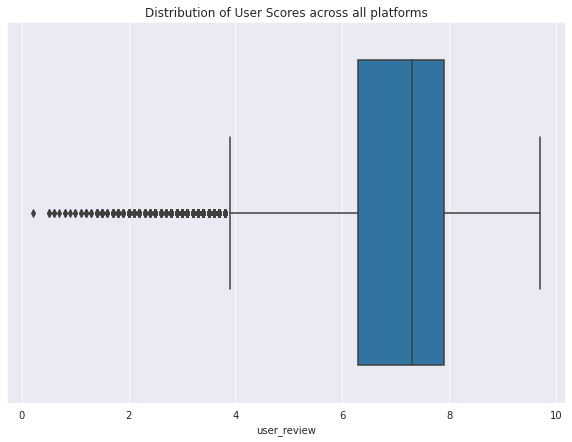

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='user_review',data=without_review)
T = plt.title("Distribution of User Scores across all platforms")

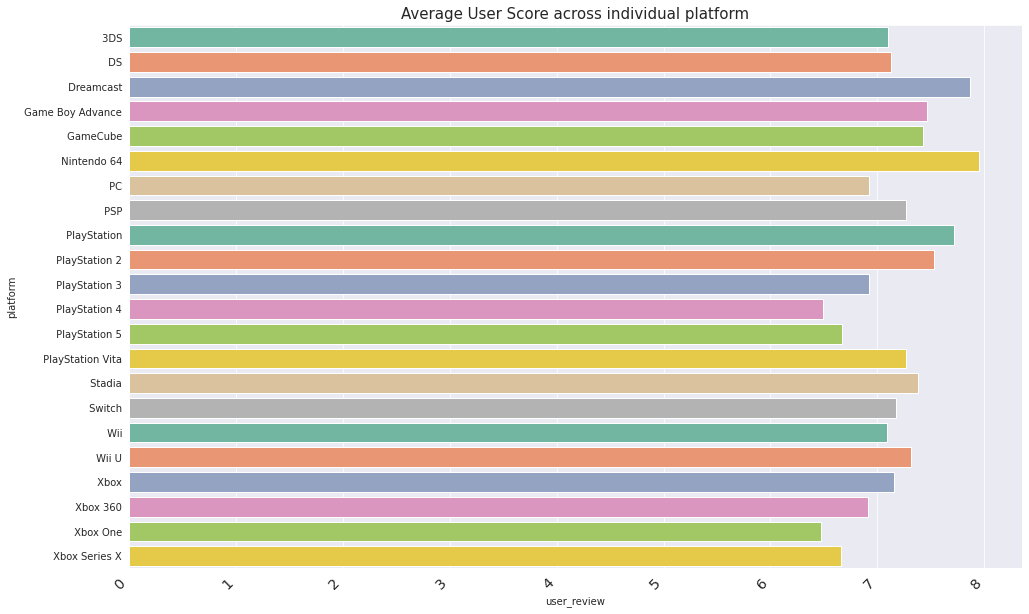

In [26]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.barplot(y = 'platform',x='user_review',data=Mean_Platform,palette="Set2")
ax = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
T = plt.title('Average User Score across individual platform',size=15)

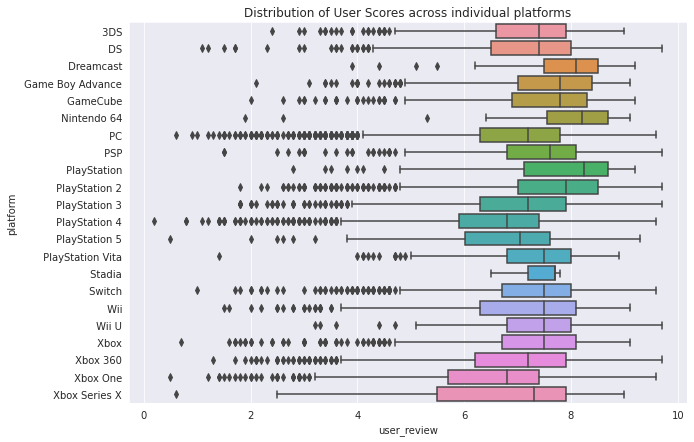

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x='user_review',y='platform',data=without_review)
T = plt.title("Distribution of User Scores across individual platforms")

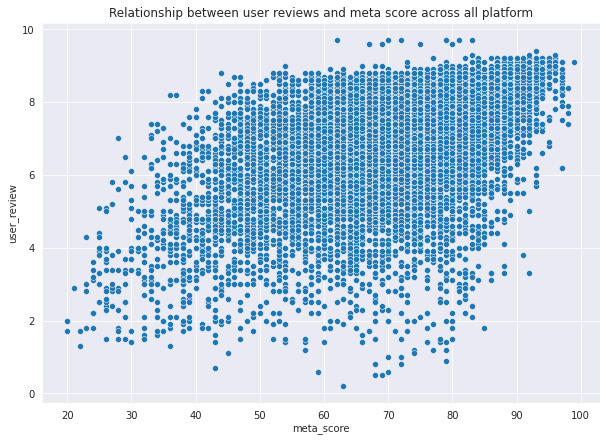

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="meta_score", y="user_review",data=without_review)
T = plt.title("Relationship between user reviews and meta score across all platform")

Relationship between user review and meta score across individual platforms


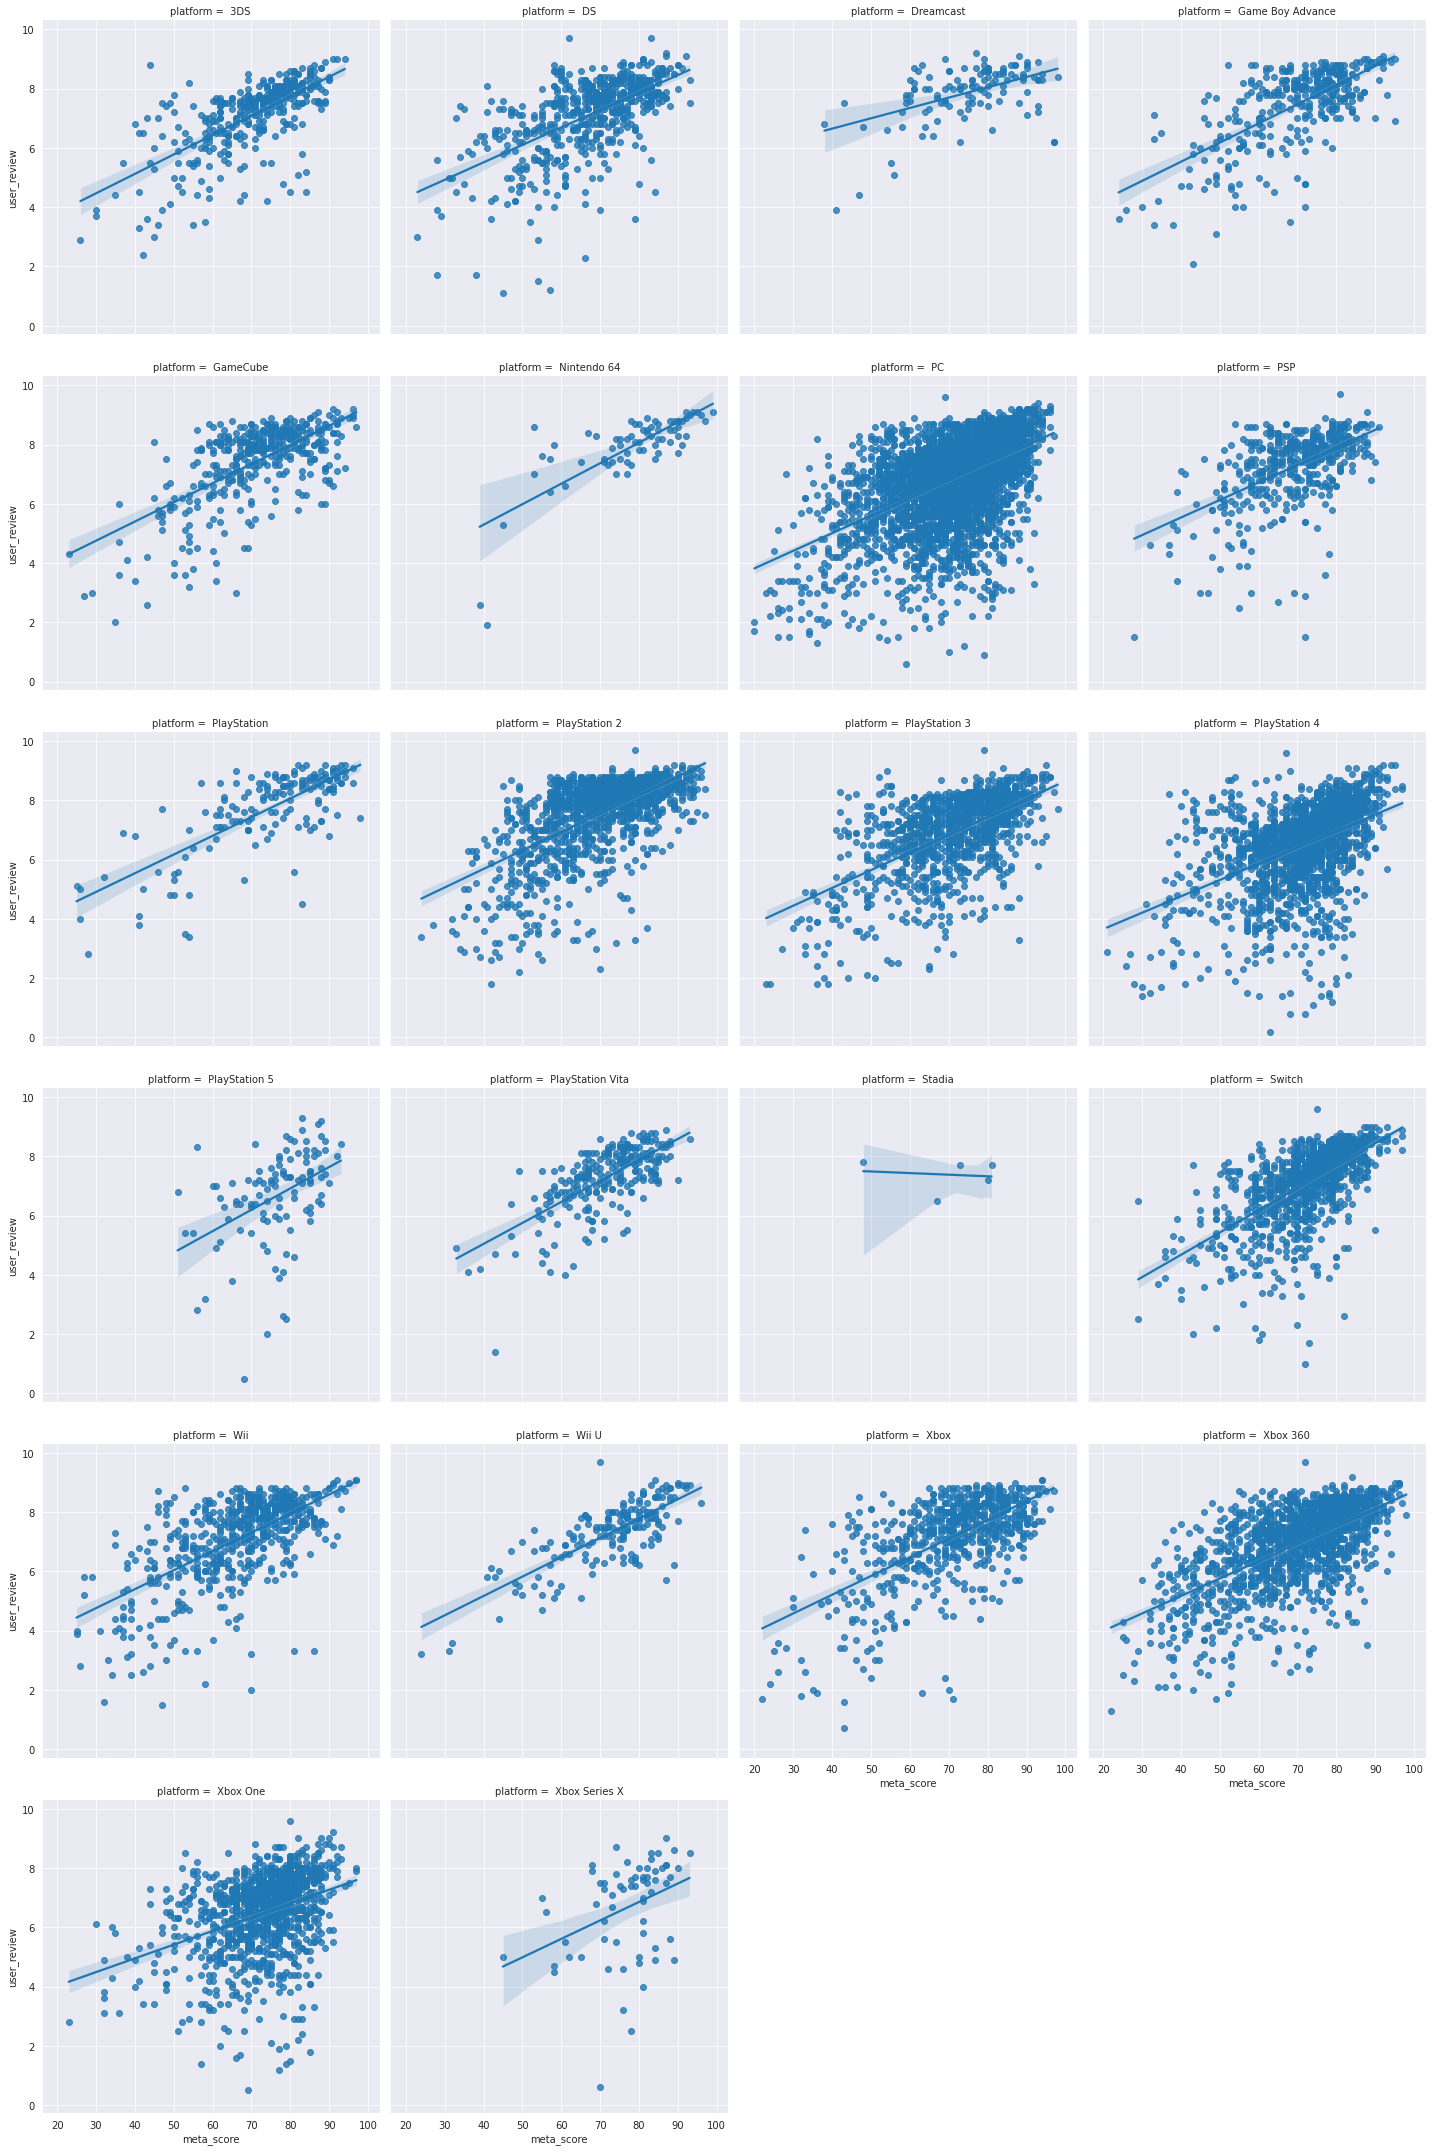

In [29]:
print("\033[1m"+"Relationship between user review and meta score across individual platforms"+"\033[0m")
T = sns.lmplot(x="meta_score", y="user_review", col="platform", data=without_review,
           col_wrap=4, height=5);

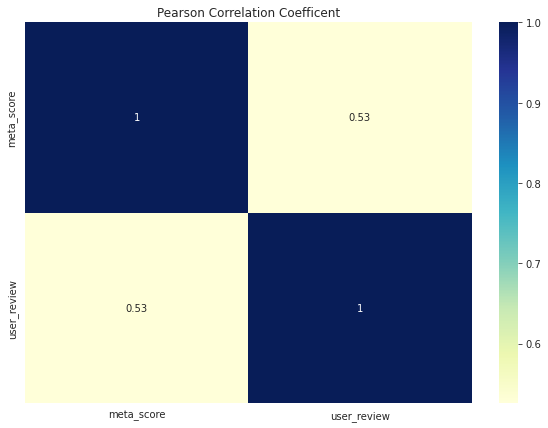

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(without_review.corr(method='pearson'),cmap="YlGnBu", annot=True)
T = plt.title("Pearson Correlation Coefficent")

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
maov = ols('meta_score~ platform', data=without_review).fit() 
aov = sm.stats.anova_lm(maov,typ=2) 

In [32]:
print(aov)

                sum_sq       df          F        PR(>F)
platform  6.886216e+04     21.0  22.467515  1.646112e-85
Residual  2.740663e+06  18778.0        NaN           NaN


In [33]:
maov = ols('user_review~ platform', data=without_review).fit() #OLD
aov = sm.stats.anova_lm(maov,typ=2) 

In [34]:
print(aov)

                sum_sq       df          F         PR(>F)
platform   1779.339242     21.0  49.070258  1.227657e-198
Residual  30067.319780  17413.0        NaN            NaN


In [35]:
without_review.head(3)

,name,platform,release_date,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",98,7.7


In [36]:
without_review['Year'] = pd.DatetimeIndex(without_review['release_date']).year
print("\033[1m"+F"Checking for any null Values in release date - {any(without_review['Year'].isnull())}"+"\033[0m")

Checking for any null Values in release date - False


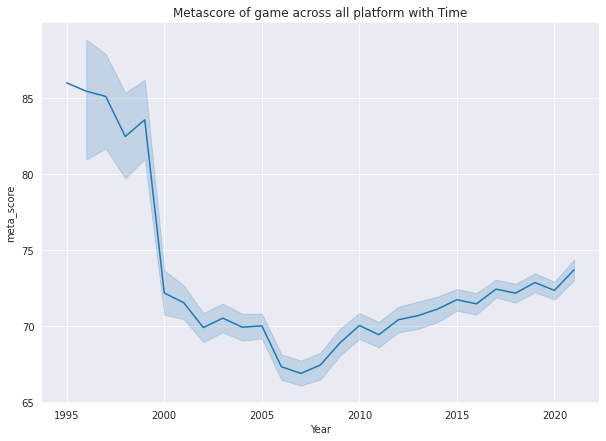

In [37]:
plt.figure(figsize=(10,7))
sns.lineplot(data = without_review, x  = without_review['Year'], y =without_review['meta_score'])
T = plt.title("Metascore of game across all platform with Time")

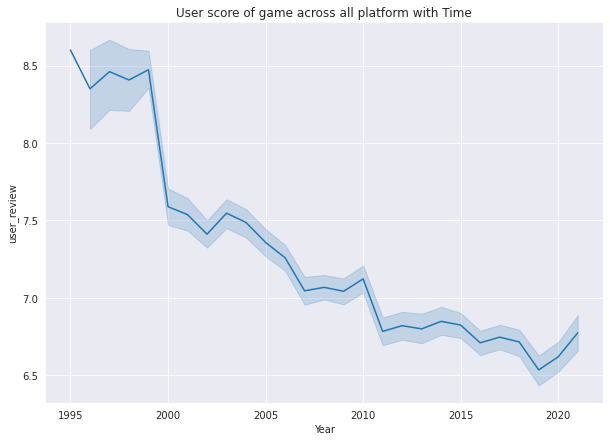

In [38]:
plt.figure(figsize=(10,7))
sns.lineplot(data = without_review, x  = without_review['Year'], y =without_review['user_review'])
T = plt.title("User score of game across all platform with Time")

Relationship between meta score across individual platforms with Year


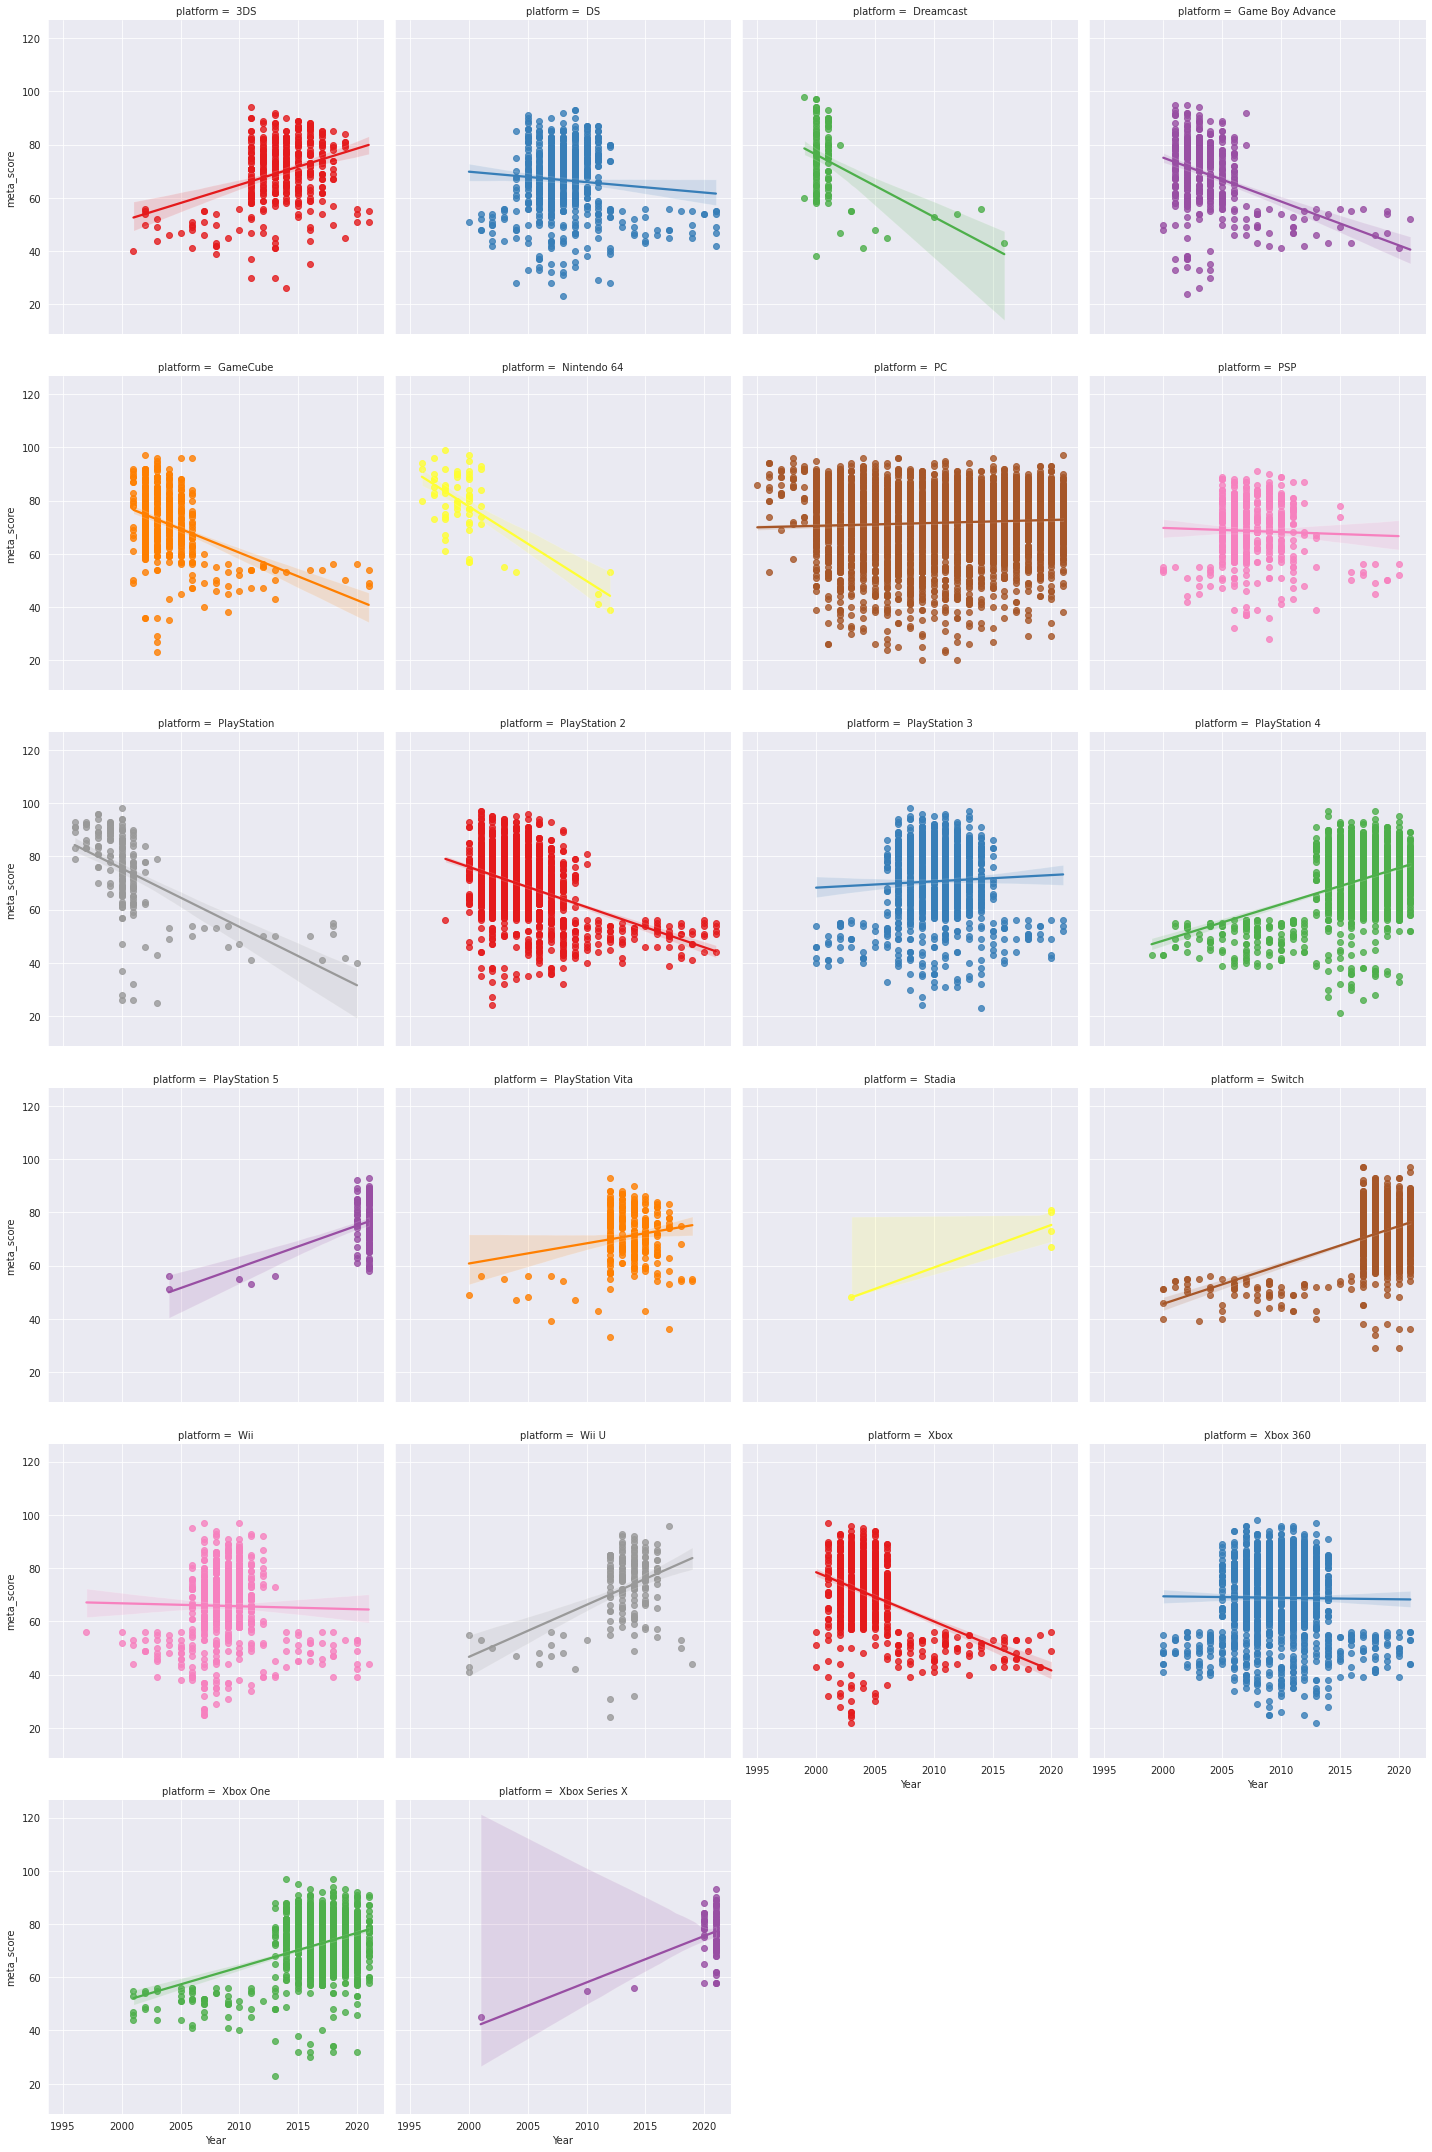

In [39]:
print("\033[1m"+"Relationship between meta score across individual platforms with Year"+"\033[0m")
sns.lmplot(x="Year", y="meta_score", col="platform", data=without_review,
           col_wrap=4, height=5,palette="Set1",hue="platform");

Relationship between user review across individual platforms with Year


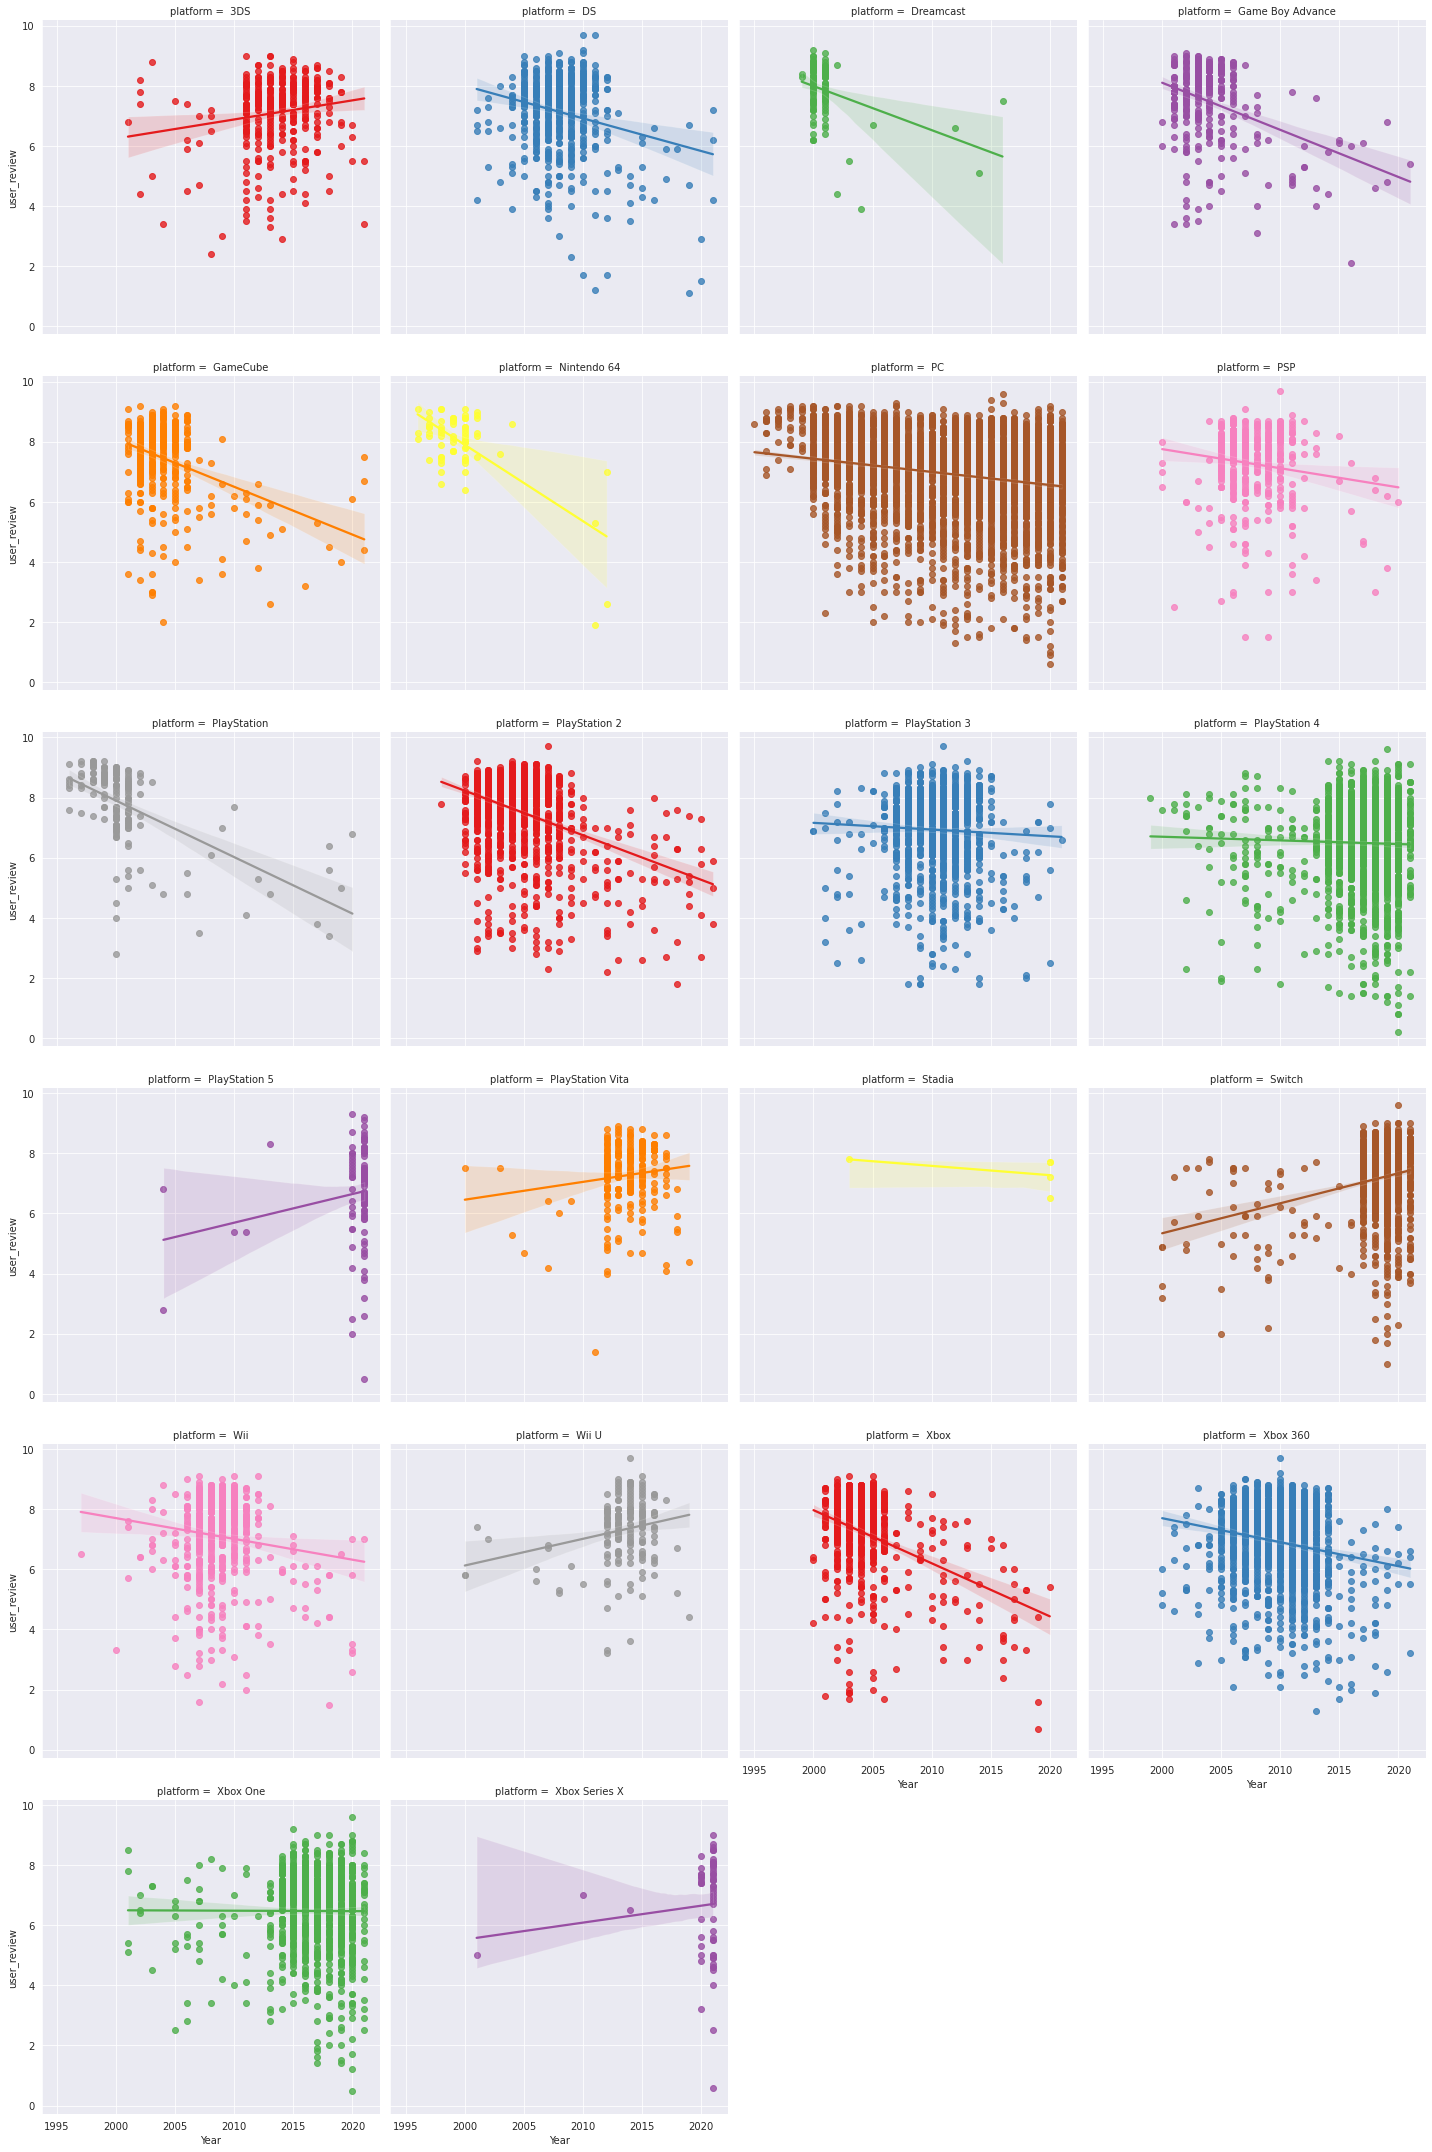

In [40]:
print("\033[1m"+"Relationship between user review across individual platforms with Year"+"\033[0m")
sns.lmplot(x="Year", y="user_review", col="platform", data=without_review,
           col_wrap=4, height=5,palette="Set1",hue="platform");

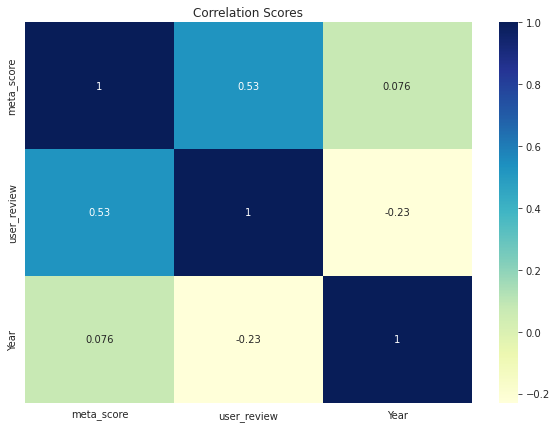

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(without_review.corr(method='pearson'),annot=True,cmap="YlGnBu")
T = plt.title("Correlation Scores")